In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load the NetCDF4 file ===

In [2]:
file_path = 'ClimateData.nc' # Replace with your NetCDF4 file path
ds = xr.open_dataset(file_path)
# Print dataset to confirm structure
print(ds)

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2024-01-01T08:00:00
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      <U4 16B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-09T02:41 GRIB to CDM+CF via cfgrib-0.9.1...


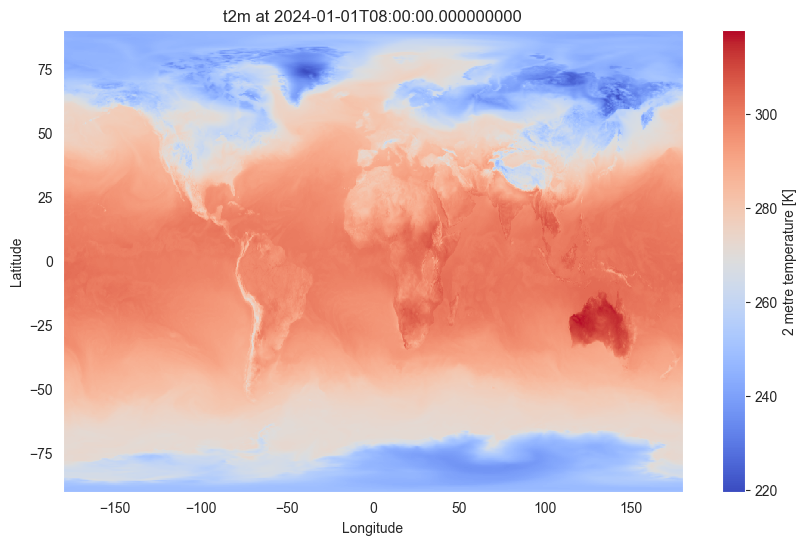

In [3]:
# Select the variable
var_name = 't2m' # 2-meter temperature
data = ds[var_name]

# Select the first time step using 'valid_time'
data_at_time = data.isel(valid_time=0)

# Plot
plt.figure(figsize=(10, 6))
data_at_time.plot(cmap="coolwarm")
plt.title(f"{var_name} at {str(data['valid_time'].values[0])}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load the NetCDF file ===
file_path = 'ClimateData.nc'
ds = Dataset(file_path, mode='r')


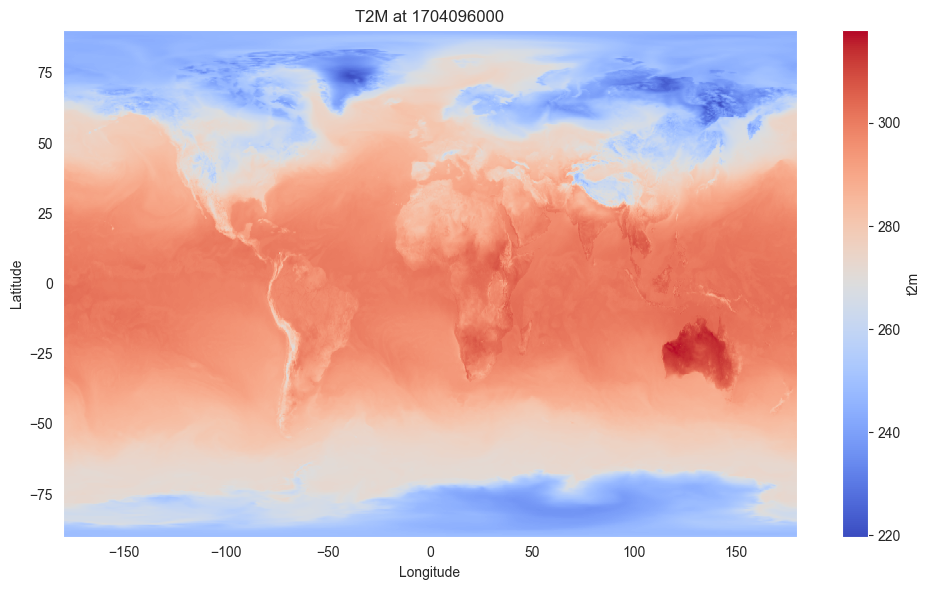

In [5]:
# === 2. Extract variables ===
var_name = 't2m'
t2m = ds.variables[var_name]      # shape: (time, lat, lon)
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['valid_time']

# === 3. Select first time step ===
data_at_time = t2m[0, :, :]

# === 4. Create 2D meshgrid of lon/lat for plotting ===
lon_grid, lat_grid = np.meshgrid(lon, lat)

# === 5. Plot using pcolormesh for continuous colourbar ===
plt.figure(figsize=(10, 6))
c = plt.pcolormesh(lon_grid, lat_grid, data_at_time, cmap='coolwarm', shading='auto')
plt.title(f"{var_name.upper()} at {time[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(c, label=var_name)
plt.tight_layout()
plt.show()

# === 6. Close the dataset ===
ds.close()